In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
import imageio
import io
%matplotlib inline

data = pd.read_csv('podatki-smrti-statRegije.csv',delimiter=';', skiprows=[0,1], encoding='windows-1252')
data = data.head(13)
data = data.drop(data.columns[0], axis=1)
data.replace('...', 0, inplace=True)
data = data.rename(columns=lambda x: x.split()[0])

Razlika (v procentih) smrti dveh let po statističnih regijah.

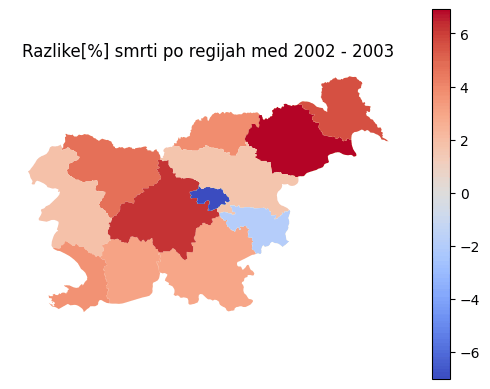

In [2]:
slovenia = gpd.read_file('stanford-kt691jt0328-shapefile/kt691jt0328.shp')
slovenia['name_1'] = slovenia['name_1'].str.replace('?', 'š')
slovenia['name_1'] = slovenia['name_1'].str.replace('Spodnjeposavska', 'Posavska')
slovenia['name_1'] = slovenia['name_1'].str.replace('Notranjsko-kraška', 'Primorsko-notranjska')

merged = slovenia.merge(data, left_on="name_1", right_on="STATISTIÈNA")
diff = merged.copy()


def make_image(year):
    val = []
    if year != '2002':
        prev_year = str(int(year) - 1)
        for i, row in merged.iterrows():
            val.append((row[year] - row[prev_year]) / row[prev_year] * 100)
        else:
            diff[year] = val

    ax = diff.plot(column=year, cmap='coolwarm', legend=True)
    ax.set_title(f"Razlike[%] smrti po regijah med {prev_year} - {year}")
    ax.set_axis_off()
    fig = ax.get_figure()

    buffer = io.BytesIO()
    fig.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = Image.open(buffer)

    plt.close()

    return image

images = []
for i in range(2003, 2022):
    images.append(make_image(str(i)))

imageio.mimsave("animated_map.gif", images, fps=1)

from IPython.display import Image

with open('animated_map.gif','rb') as f:
    display(Image(data=f.read(), format='gif'))
